In [1]:
#importer les packages nécessaires
import pandas as pd
import numpy as np

#les packages de visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#importer les packages de préparation de données
from sklearn.preprocessing import StandardScaler

#importer les packages de clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA



C:\Users\vivie\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#import data
file_path = "C:\\Users\\vivie\\Downloads\\StressLevelDataset.csv"
df=pd.read_csv(file_path)
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [3]:
parametre1='headache'
parametre2="sleep_quality"


dfa=df[[parametre1,parametre2]]
dfa



,headache,sleep_quality
0,2,2
1,5,1
2,2,2
3,4,1
4,2,5
...,...,...
1095,3,3
1096,0,0
1097,1,5
1098,5,1


In [4]:
#center and reduce our data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(dfa)
x_scaled

array([[-0.36074135, -0.42644513],
       [ 1.76885873, -1.0725741 ],
       [-0.36074135, -0.42644513],
       ...,
       [-1.07060804,  1.51194181],
       [ 1.76885873, -1.0725741 ],
       [ 0.34912535, -1.71870308]])

In [5]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

C:\Users\vivie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


[2199.9999999999986,
 857.4883000378363,
 534.737412371549,
 384.22097836486165,
 279.9218535870369,
 221.3051293986658,
 172.53881837746047,
 140.52958915011453,
 105.60238339431947,
 87.0766195629942]

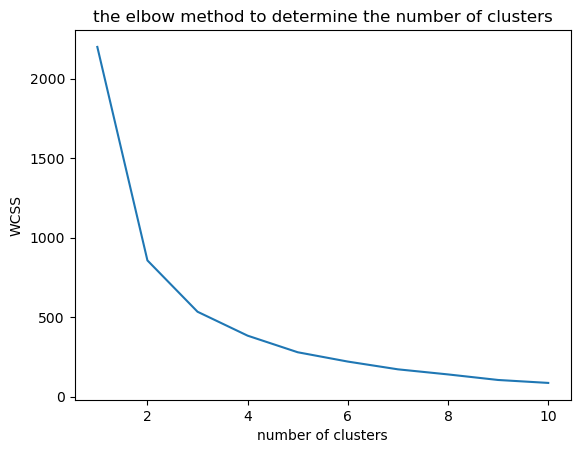

In [6]:
plt.plot(range(1, 11), wcss)
plt.title('the elbow method to determine the number of clusters')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
kmeans_etats = KMeans(n_clusters=3, init = 'k-means++')


In [8]:
kmeans_etats.fit(x_scaled)


KMeans(n_clusters=3)

In [9]:
clusters = kmeans_etats.predict(x_scaled)


In [10]:
dfa['cluster']=clusters
dfa

C:\Users\vivie\AppData\Local\Temp\ipykernel_25828\2827658313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['cluster']=clusters


,headache,sleep_quality,cluster
0,2,2,2
1,5,1,0
2,2,2,2
3,4,1,0
4,2,5,1
...,...,...,...
1095,3,3,2
1096,0,0,2
1097,1,5,1
1098,5,1,0


In [11]:
dfa_clusters = dfa.groupby(['cluster']).median().round(0)
dfa_clusters


,headache,sleep_quality
cluster,,
0,4.0,1.0
1,1.0,4.0
2,3.0,2.0


In [12]:
for i in range(4):
    print(f'Cluster {i}')
    print(dfa[dfa.cluster == i].index.tolist())
    print()

Cluster 0
[1, 3, 5, 7, 9, 10, 11, 13, 19, 21, 23, 26, 29, 31, 32, 38, 43, 44, 46, 53, 61, 66, 71, 74, 75, 76, 79, 82, 87, 89, 91, 92, 96, 97, 106, 108, 109, 111, 115, 117, 118, 121, 137, 147, 149, 153, 154, 161, 162, 165, 175, 176, 177, 181, 185, 189, 192, 194, 195, 196, 200, 201, 202, 204, 205, 206, 207, 208, 209, 215, 220, 223, 234, 235, 236, 247, 248, 250, 267, 272, 273, 276, 277, 278, 280, 282, 283, 284, 285, 286, 288, 289, 294, 303, 308, 312, 313, 316, 320, 322, 323, 328, 340, 342, 343, 344, 345, 346, 347, 348, 349, 353, 354, 355, 366, 371, 374, 375, 378, 382, 384, 385, 388, 391, 393, 394, 398, 399, 400, 401, 403, 406, 415, 417, 423, 426, 429, 430, 443, 445, 446, 447, 448, 450, 453, 460, 461, 464, 466, 467, 469, 470, 476, 477, 480, 482, 483, 484, 485, 490, 491, 494, 496, 499, 501, 503, 504, 508, 511, 513, 518, 523, 527, 535, 537, 538, 539, 540, 542, 545, 557, 558, 562, 563, 567, 572, 580, 587, 591, 593, 596, 597, 601, 602, 616, 631, 633, 635, 641, 642, 644, 649, 656, 661, 662, 677

In [13]:
# Assuming max_values contains the maximum values for each column in dfa
max_values = dfa[[parametre1, parametre2]].max()




# Assuming target_columns is the list ['parametre1', 'parametre2']
values = {}
for column in dfa_clusters:
    try:
        user_input = float(input(f'Give a score between 1 and 10 for your level of {column}: '))
        if 0 <= user_input <= 10:
            values[column] = user_input  # Store the valid input in the dictionary
        else:
            print("Value must be between 1 and 10. Please try again.")
    except ValueError:
        print("Invalid input. Please enter a numeric value.")

        
        
# Calculate scaled values
scaled_values = {}
for column in dfa_clusters:
    scaled_value = (values[column])
    scaled_values[column] = scaled_value

# Now 'scaled_values' dictionary contains the scaled values for each column
print(scaled_values)


Give a score between 1 and 10 for your level of headache:  7
Give a score between 1 and 10 for your level of sleep_quality:  3


{'headache': 7.0, 'sleep_quality': 3.0}


In [14]:
# Create a DataFrame with user values
user_df = pd.DataFrame([scaled_values]) / 10
#print(user_df)

# Normalize each criterion of reference clusters in the same way
dfa_clusters_normalized = dfa_clusters / max_values
#print(dfa_clusters_normalized)

# Calculate the Euclidean distance between normalized values and cluster centers
distances = np.linalg.norm(user_df.values - dfa_clusters_normalized.values[:, :2], axis=1)
#print(distances)

# Find the index of the closest cluster
closest_cluster_index = np.argmin(distances)
#print(closest_cluster_index)

# Retrieve the cluster number
predicted_cluster = dfa_clusters_normalized.index[closest_cluster_index]

print(f"The normalized user values are closest to Cluster {predicted_cluster}")

# Calculate reliability based on the inverse of the distance
reliability = 1 / (1 + distances[closest_cluster_index])

# Display reliability
print(f"Reliability of the result: {reliability * 100}%")


The normalized user values are closest to Cluster 0
Reliability of the result: 87.61006569007046%


In [15]:
text1 = """
+----------------------------------------------------------------+
| You are also susceptible to headaches. Analyzing the sources   |
| of the latter (food, level of fatigue) and methods to reduce   |
| them is essential.                                             |
|                                                                |
| Summary: Your state of health regarding these 2 criteria is    |
| hampering your student life. Indeed, poor sleep quality like   |
| yours can disrupt your concentration and cognitive function,   |
| thus hindering your academic performance and therefore         |
| increasing your stress. Frequent headaches can also generate   |
| physical distress, contributing to a continued stressful       |
| experience among students.                                     |
+----------------------------------------------------------------+
"""


In [16]:
text2 = """
+----------------------------------------------------------------+
| You rarely have headaches, and your sleep quality is high and  |
| stable. Poor sleep quality can disrupt concentration and       |
| cognitive function, hindering academic performance. However,   |
| your current health situation is remarkable, ranking above     |
| average in terms of sleep quality and headache frequency       |
| compared to the general student population.                    |
|                                                                |
| Bottom line: Continue to maintain those excellent sleep cycles |
| that suit you perfectly. Headaches are rare, indicating good   |
| overall health. This positivity in your health plays a crucial |
| role in preventing student stress, as it promotes greater      |
| resilience in the face of academic pressures and daily         |
| challenges. Continue your healthy habits to maintain that      |
| positivity and strengthen your ability to cope with stress.    |
+----------------------------------------------------------------+
"""


In [17]:
text3 = """
+-----------------------------------------------------------------+
| You sometimes have headaches, and your sleep quality is         |
| moderate. It is important to note that frequent headaches and   |
| reduced sleep quality can negatively influence concentration    |
| and cognitive function, potentially hindering academic          |
| performance.                                                    |
|                                                                 |
| Assessment: Currently, your health situation, although slightly |
| below average in terms of headache frequency and sleep quality  |
| compared to the general student population, may benefit from    |
| improvement. To maintain good overall health and prevent        |
| student stress, it would be wise to work on improving your      |
| sleep habits and look for solutions to reduce the frequency of  |
| headaches. By investing in these adjustments, you will          |
| strengthen your ability to cope with academic pressures and     |
| daily challenges. Continue to adopt healthy habits to move      |
| toward increased positivity in your mental health.              |
+-----------------------------------------------------------------+
"""


In [18]:
# Retrieve the values of anxiety_level, self_esteem, and depression for the predicted cluster
predicted_values = dfa_clusters.loc[predicted_cluster, [parametre1, parametre2]]


if predicted_values[parametre1] == 4.0 and predicted_values[parametre2] == 1.0 :
    print(text1)
    
if predicted_values[parametre1] == 1.0 and predicted_values[parametre2] == 4.0 :
    print(text2)
    
if predicted_values[parametre1] == 3.0 and predicted_values[parametre2] == 2.0 :
    print(text3)


+----------------------------------------------------------------+
| You are also susceptible to headaches. Analyzing the sources   |
| of the latter (food, level of fatigue) and methods to reduce   |
| them is essential.                                             |
|                                                                |
| Summary: Your state of health regarding these 2 criteria is    |
| hampering your student life. Indeed, poor sleep quality like   |
| yours can disrupt your concentration and cognitive function,   |
| thus hindering your academic performance and therefore         |
| increasing your stress. Frequent headaches can also generate   |
| physical distress, contributing to a continued stressful       |
| experience among students.                                     |
+----------------------------------------------------------------+

